<h1> p1. 당뇨병 수치 _ 선형회계 </h1>
- 두번째 프로젝트 따로 있습니다.    링크      
- https://github.com/ittapa/AIFFEL_LSG/blob/master/lms/E05-weather_cycle/04-project_2_weather_cycle.ipynb


1. 데이터 가져오기
2. 모델에 입력할 데이터 X 준비하기
3. 모델에 예측할 데이터 y 준비하기
4. train 데이터와 test 데이터로 분리하기
5. 모델 준비하기
6. 손실함수 loss 정의하기
7. 기울기 구하는 함수 구현(gradient)
8. 하이퍼 파리미터 러닝레이트 지정
9. 모델학습하기
10. 성능 확인 test data
11. 시각화

## LIBARRY IMPORT

In [235]:
#LIBARRY
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# font set
font_path = '/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

## data import

In [14]:
'''
당뇨병 진행도 예측 데이터 442명 10종류의 독립변수
age: 나이
sex: 성별
bmi: BMI(Body mass index)지수
bp: 평균혈압
s1~s6: 6종류의 혈액검사수치
'''

diabetes = load_diabetes()
#print(diabetes)

#df = pd.dataframe(diabetes.data,)
diabetes.feature_names
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


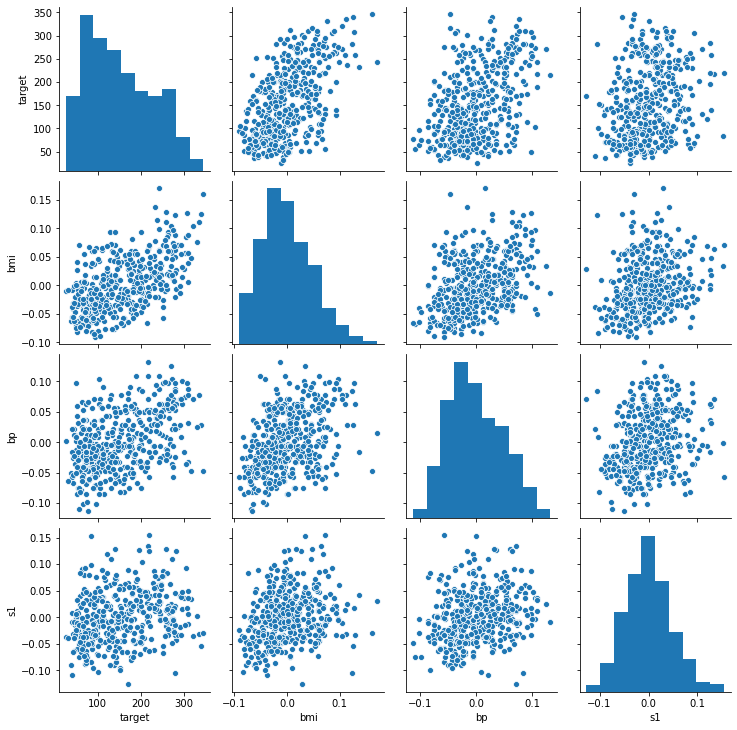

In [133]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

## 모델에 입력할 데이터 X Y 준비하기

In [30]:
df_x = df[['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']].values
df_y = df["target"].values
df_x.shape, df_y.shape

((442, 10), (442,))

## train - tset data spilt

In [35]:
X_train, X_test, y_train, y_test  = train_test_split(df_x, df_y, test_size=0.2, random_state=8)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## Model 준비하기 w, b

In [214]:
o_W = np.random.rand(10) #10개
o_b = np.random.rand() #1개
o_W, o_b

(array([0.44687412, 0.26297335, 0.91712143, 0.06788371, 0.68666959,
        0.07828788, 0.23960713, 0.80996499, 0.14088225, 0.34540214]),
 0.1882558162439265)

In [159]:
# model
'''
y=w1x1+w2x2+w3x3+w4x4+w5x5+w6x6+w7x7+w8x8+w9x9+w10x10+w11x11+w12x12+b
'''

def model(X,W,b):
    p = 0
    for idx in range(len(W)):
        p = p + X[:,idx] * W[idx]
    p = p + b
    return p


## loss 정의하기 _ MSE

In [160]:
# mse loss fn
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

def loss(X,W,b,y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
    

## 기울기 함수(gradient) fn

In [161]:
def gradient(X, W, b, y):
    N = len(X)
    y_pred = model(X,W,b)
    dw = 1/N * 2 * X.T.dot(y_pred-y)
    db = 2 * (y_pred-y).mean()
    return dw, db
    

## 하이퍼 파리미터 설정

In [257]:
LEARNING_RATE = 0.01

## 모델 학습하기



In [258]:
losses = []

W = o_W
b = o_b
# 1000번 돌리기
for i in range(1, 2001):
    dw, db = gradient(X_train, W, b, y_train)
    
    W -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(df_x, W, b, df_y)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
    

Iteration 100 : Loss 3594.6241
Iteration 200 : Loss 3196.4028
Iteration 300 : Loss 3188.1632
Iteration 400 : Loss 3186.8288
Iteration 500 : Loss 3185.6391
Iteration 600 : Loss 3184.4714
Iteration 700 : Loss 3183.3227
Iteration 800 : Loss 3182.1926
Iteration 900 : Loss 3181.0808
Iteration 1000 : Loss 3179.9869
Iteration 1100 : Loss 3178.9105
Iteration 1200 : Loss 3177.8514
Iteration 1300 : Loss 3176.8092
Iteration 1400 : Loss 3175.7836
Iteration 1500 : Loss 3174.7743
Iteration 1600 : Loss 3173.7810
Iteration 1700 : Loss 3172.8034
Iteration 1800 : Loss 3171.8412
Iteration 1900 : Loss 3170.8942
Iteration 2000 : Loss 3169.9621


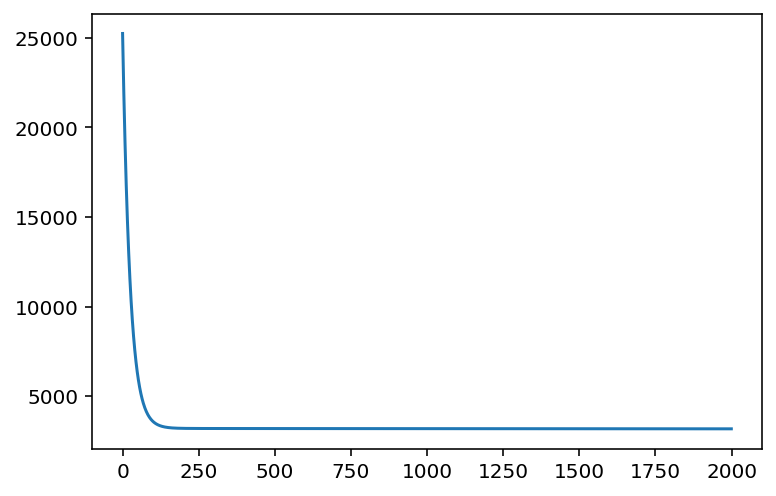

In [259]:
plt.plot(losses)
plt.show()

## test 데이터로 성능 확인하기

In [260]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2832.653050430788

## 그래프로 그리기


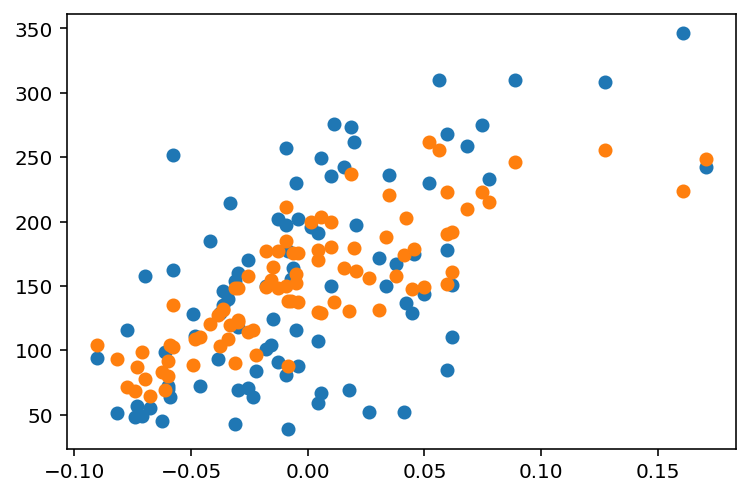

In [261]:
plt.scatter(X_test[:, 0], y_test) # # 실제
plt.scatter(X_test[:, 0], prediction) # 예측
plt.show()

## 실험 
- 상관 관계가 높은 4개 특성만 가지고....
- learning rate 및 학습 수 수정.

In [215]:
## 상관 관계
for a in ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']:
    b = np.corrcoef(df[a], df['target'])
    print (a, b)
    print()

#print(np.corrcoef(df["bmi"], df['target']))
#print(np.corrcoef(df["age"], df['target']))

age [[1.         0.18788875]
 [0.18788875 1.        ]]

sex [[1.       0.043062]
 [0.043062 1.      ]]

bmi [[1.         0.58645013]
 [0.58645013 1.        ]]

bp [[1.         0.44148385]
 [0.44148385 1.        ]]

s1 [[1.         0.21202248]
 [0.21202248 1.        ]]

s2 [[1.         0.17405359]
 [0.17405359 1.        ]]

s3 [[ 1.         -0.39478925]
 [-0.39478925  1.        ]]

s4 [[1.         0.43045288]
 [0.43045288 1.        ]]

s5 [[1.         0.56588343]
 [0.56588343 1.        ]]

s6 [[1.         0.38248348]
 [0.38248348 1.        ]]



### bmi bp s4 s5

In [246]:
df_x = df[['bmi','bp','s4','s5']].values
df_y = df["target"].values
df_x.shape, df_y.shape

X_train, X_test, y_train, y_test  = train_test_split(df_x, df_y, test_size=0.2, random_state=8)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 4) (353,)
(89, 4) (89,)


Iteration 1000 : Loss 5430.0234
Iteration 2000 : Loss 5024.8445
Iteration 3000 : Loss 4692.2287
Iteration 4000 : Loss 4419.0316
Iteration 5000 : Loss 4194.4995
Iteration 6000 : Loss 4009.8336
Iteration 7000 : Loss 3857.8346
Iteration 8000 : Loss 3732.6106
Iteration 9000 : Loss 3629.3397
Iteration 10000 : Loss 3544.0750
Iteration 11000 : Loss 3473.5853
Iteration 12000 : Loss 3415.2250
Iteration 13000 : Loss 3366.8277
Iteration 14000 : Loss 3326.6187
Iteration 15000 : Loss 3293.1440
Iteration 16000 : Loss 3265.2124
Iteration 17000 : Loss 3241.8470
Iteration 18000 : Loss 3222.2471
Iteration 19000 : Loss 3205.7556
Iteration 20000 : Loss 3191.8335


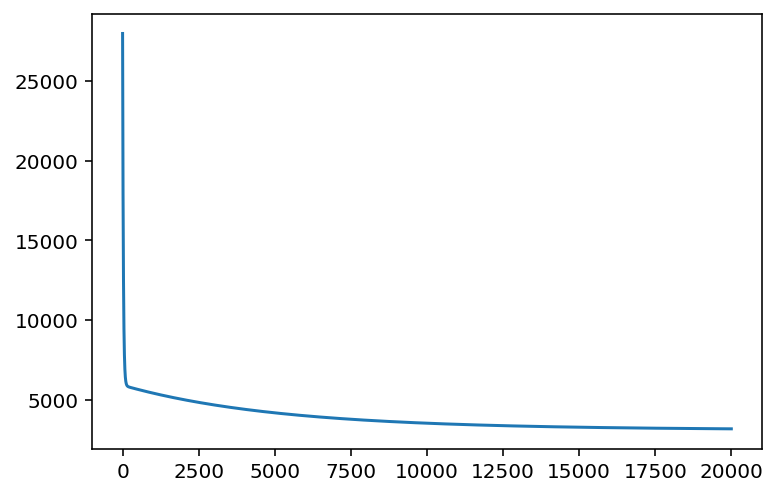

In [253]:
o_W = np.random.rand(4) #10개
o_b = np.random.rand() #1개

losses2 = []
LEARNING_RATE2 = 0.01

W = o_W
b = o_b
# 1000번 돌리기
for i in range(1, 20001):
    dw, db = gradient(X_train, W, b, y_train)
    
    W -= LEARNING_RATE2 * dw
    b -= LEARNING_RATE2 * db
    L = loss(df_x, W, b, df_y)
    losses2.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
plt.plot(losses2)
plt.show()


In [254]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2852.7817402023165

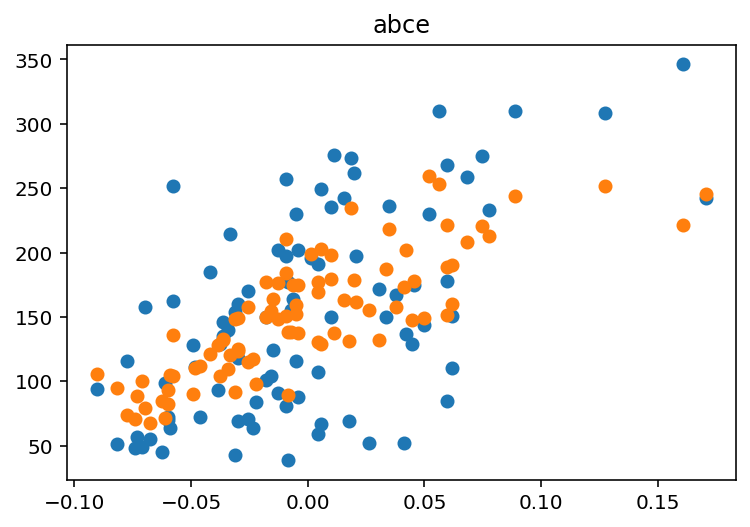

In [255]:
plt.scatter(X_test[:, 0], y_test) # # 실제
plt.scatter(X_test[:, 0], prediction) # 예측
plt.title("abce")
plt.show()

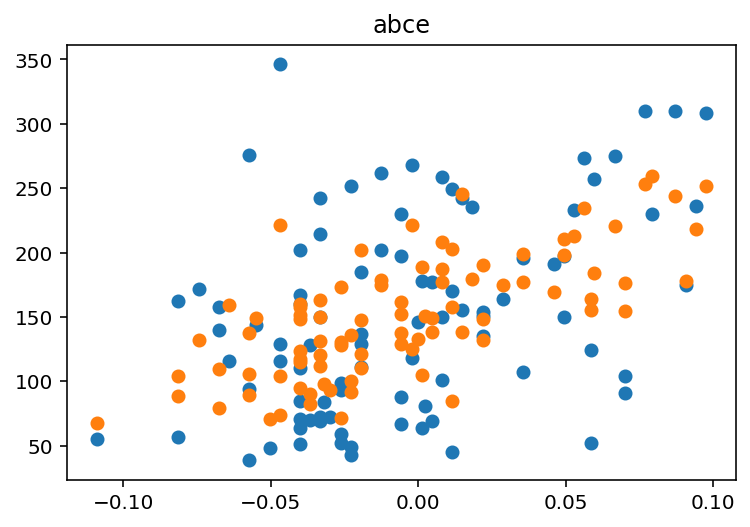

In [256]:
plt.scatter(X_test[:, 1], y_test) # # 실제
plt.scatter(X_test[:, 1], prediction) # 예측
plt.title("abce")
plt.show()

두번째 프로젝트 따로 있습니다. 링크   
https://github.com/ittapa/AIFFEL_LSG/blob/master/lms/E05-weather_cycle/04-project_2_weather_cycle.ipynb